<center><u><H1>Seaborn-Datos Numéricos</H1></u></center>

In [1]:
#Librerias
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Plotting univariate distributions:

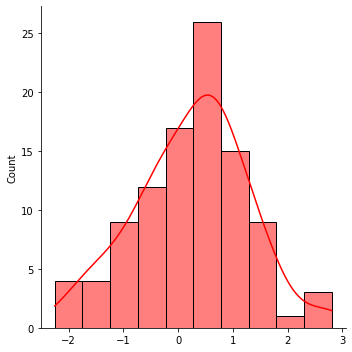

In [3]:
#Grafico de una variable continua
# displot function
x = np.random.normal(size=100) #distribucion normal de random
sns.displot(x, kde=True, color='red')#kde sirve para mostrar la linea de aproximacion

## Histograms:

- A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin. we also can plot a rug plot, which draws a small vertical tick at each observation.

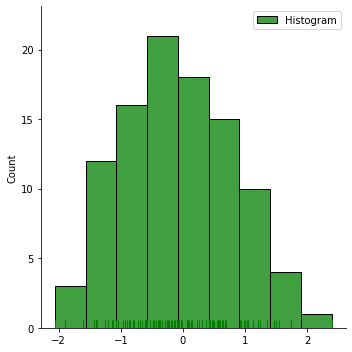

In [23]:
#histograma, densidad de la data con "rug"
sns.displot(x, kde=False, rug=True, color='green', label='Histogram')
plt.legend(loc='best')

### Kernel Density Estimation:

C:\Users\julio\anaconda39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\julio\anaconda39\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

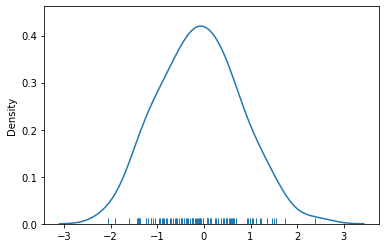

In [37]:
#Distribucion y densidad de la info
sns.distplot(x, rug=True, hist=False)

<AxesSubplot:ylabel='Density'>

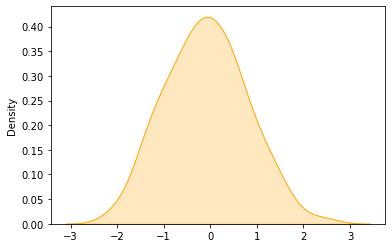

In [39]:
#Distribucion con kdeplot
sns.kdeplot(x, color='orange',shade=True)

### Joint Plot:

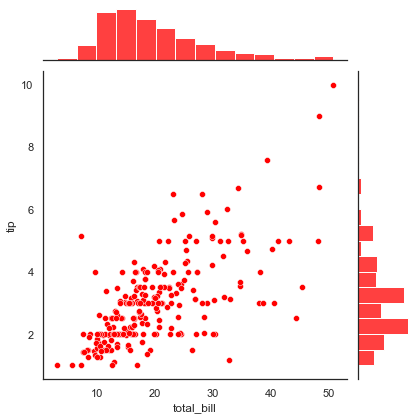

In [40]:
#Unir graficas
# Scatter plot
sns.set(style="white")
tips = sns.load_dataset("tips")
sns.jointplot(x="total_bill", y="tip", data=tips, color='red')

### Hexbin plots:
it shows the counts of observations that fall within hexagonal bins

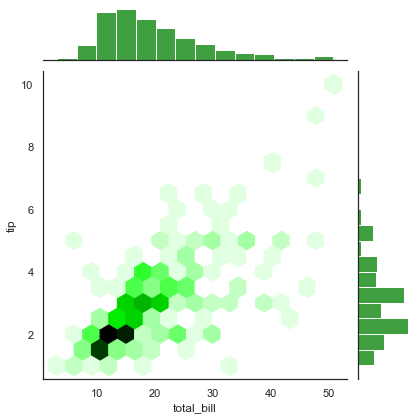

In [42]:
#Grafico de hexagono
sns.jointplot(x="total_bill", y="tip", data=tips, color='green', kind="hex")

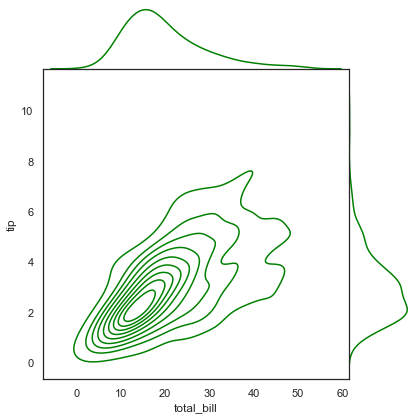

In [45]:
#"2D"
# kde plot 2D
sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde", space=0, color="green")

In [46]:
#cargamos informacion
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\julio\anaconda39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\julio\anaconda39\lib\site-packages\seaborn\axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


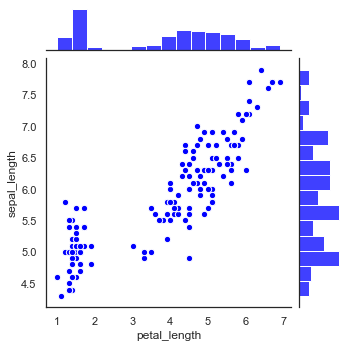

In [54]:
# Scatter plot
sns.jointplot("petal_length", "sepal_length", data=iris,
                  marginal_kws=dict(bins=15, rug=True),                  s=40, color='blue', edgecolor="w", linewidth=1,
                 height=5, ratio=5)

#### Fit Linear Regression to data:

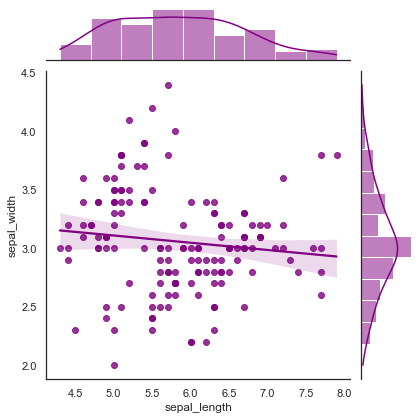

In [55]:
#Diagrama de regresion "kind="reg""
sns.jointplot(x="sepal_length", y="sepal_width", data=iris,color='purple', kind="reg", height=6)

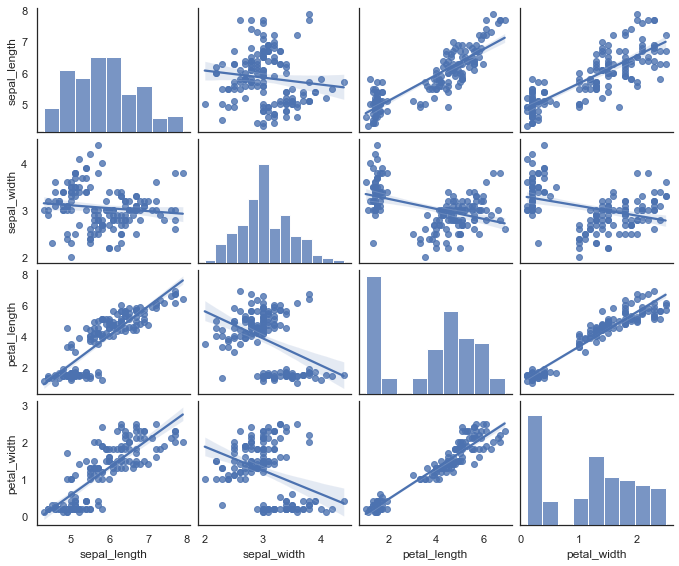

In [56]:
#Grafica de regresion por cara columna del archivo
# linear regression by multiple pair variables
sns.pairplot(iris, kind="reg", height=2, aspect=1.2)

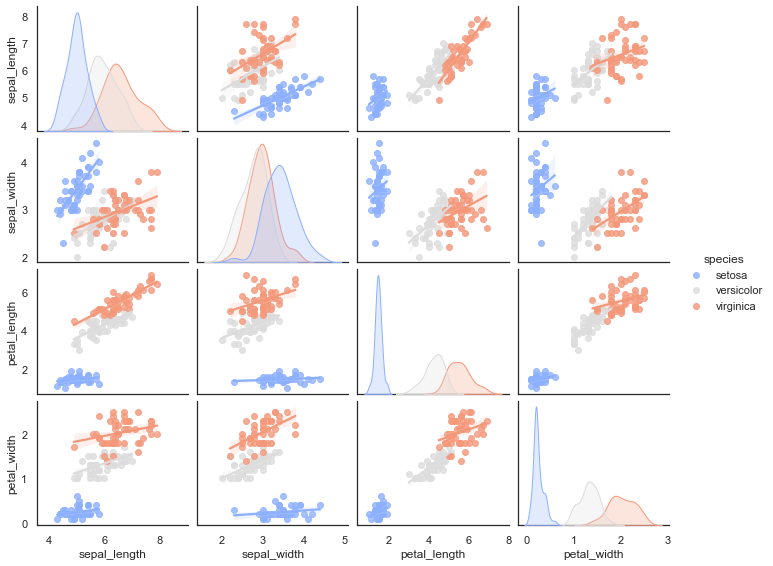

In [57]:
# Grafica de regresion por tipo de "hue="species""
sns.pairplot(iris, kind="reg", hue="species", palette="coolwarm", height=2, aspect=1.2)

## Heat Map:

### Correlation matrix:

In [58]:
#Coeficiente de correlacion
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


(4.5, -0.5)

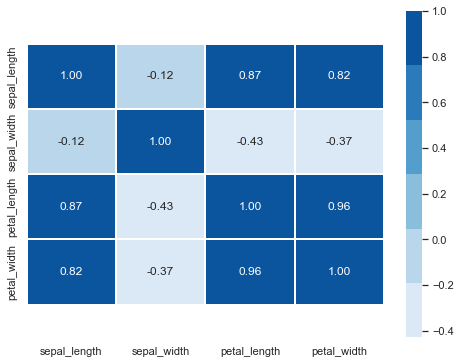

In [60]:
#Correlacion grafico heatmap
# if you dont need the colobar:cbar=False
plt.figure(figsize=(8,6))
ax = sns.heatmap(iris.corr(), annot=True, linecolor='white',linewidths=.3, fmt='.2f', cbar=True, cmap=(sns.color_palette("Blues")))
bottom, top = ax.get_ylim()#Guarda los limites del grafico
ax.set_ylim(bottom + 0.5, top - 0.5)

## Flights Dataset:

In [61]:
#Cargar dataset
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [62]:
#Cambiar orientacion de la data
f = flights.pivot_table(index='month', columns='year', values='passengers')
f

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


## Cluster Map:

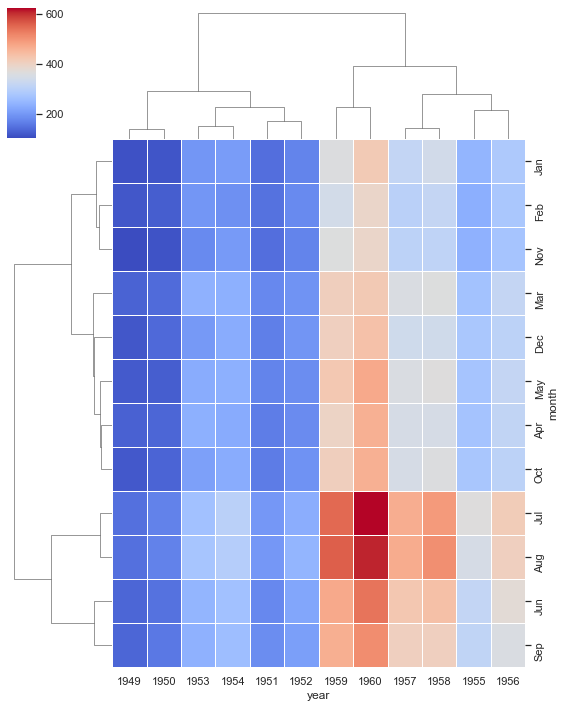

In [63]:
#Mapa de grupos
# dendogram: hierarchical relationship between objects
# The key to interpreting a dendrogram is to focus on the height
# at which any two objects are joined together.
sns.clustermap(f,figsize=(8, 10), cmap='coolwarm', linecolor='white', linewidths=1)

## Reference:

https://seaborn.pydata.org/